<a href="https://colab.research.google.com/github/RonaldTuna/PokemonCNN/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phillip Lagoc - A13469618

Ronald Tun - A12458764

Below is the code relevant to our Final Project Report for COGS 181.


In [ ]:
from google.colab import drive

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import AveragePooling2D

from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Processing

### Getting the data stored on Google Drive

Here, we are getting the data from the Google Drive.

The data is already split into a training and test set, each with images of all 151 Pokemon.

Given that there are 151 Pokemon, there are 151 classes. Each class has about 300 images each, where 80% of that are in the training set, and 20% are in the testing set.

In [ ]:
# Mounts the drive to be able to use Google Drive Files
drive.mount('/content/drive', force_remount = True) 

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/COGS 181/"

data_root = '/content/drive/My Drive/COGS 181/'

 augment.ipynb			      'Data Analysis.ipynb'   testing
'COGS 181 Final Project Report.gdoc'  'Final Project.ipynb'   training


In [ ]:
training_data_root = data_root + 'training/'
testing_data_root = data_root + 'testing/'

### Creating the Training and Testing Sets

Here, we process our dataset from Google Drive to be used by our above classifier by putting them into a training and testing set.

Since we plan to use a VGGNet, the input shape will be RGB images sized 224 x 224. The number of classes will be 10. Again, this is due to Google Colab being unable to train on the entirety of the dataset.

In [ ]:

target_size = (224, 224)
n_classes = 10
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1. / 255)

training_set = train_datagen.flow_from_directory(training_data_root, 
                                                target_size = target_size,
                                                batch_size = batch_size,
                                                class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1. / 255)
testing_set = test_datagen.flow_from_directory(testing_data_root,
                                               target_size = target_size,
                                               batch_size = batch_size,
                                               class_mode = 'categorical')

Found 2363 images belonging to 10 classes.
Found 584 images belonging to 10 classes.


In [ ]:
num_training = 2363
num_testing = 584

### VGGNet Configuration D

This is the original VGGNet configuration based off of [Simonyan and Zisserman's paper](https://arxiv.org/pdf/1409.1556.pdf).

The exact layout of this is described more in detail in our report. This code was heavily influenced by [this link](https://hackernoon.com/learning-keras-by-implementing-vgg16-from-scratch-d036733f2d5).

In [ ]:


"""
Adds the layers that are relevant to Configuration D from the VGGNet paper.

Parameters: 
model --- The model to add layers to.

Returns the Sequential model with added layers
"""
def init_config_D(input_shape, n_classes):
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape = input_shape, 
                     padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation = 'softmax'))
    
    return model

### VGGNet Configuration D1

The difference between this and Configuration D is that this uses Average Pooling instead of Max Pooling Layers.

In [ ]:


"""
Adds the layers that are relevant to Configuration D1 from our report.

Parameters: 
model --- The model to add layers to.

Returns the Sequential model with added layers
"""
def init_config_D1(input_shape, n_classes):
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape = input_shape, 
                     padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation = 'softmax'))
    
    return model

### VGGNet Configuration D2

The difference between this and Configuration D is that this uses Sigmoid as the activation layer.

In [ ]:
"""
Adds the layers that are relevant to Configuration D2 from our report.

Parameters: 
model --- The model to add layers to.

Returns the Sequential model with added layers
"""
def init_config_D2(input_shape, n_classes):
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape = input_shape, 
                     padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation = 'sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation = 'softmax'))
    
    return model

### VGGNet Configuration D3

The difference between this and Configuration D is that this has an extra layer.

In [ ]:
"""
Adds the layers that are relevant to Configuration D3 from our report.

Parameters: 
model --- The model to add layers to.

Returns the Sequential model with added layers
"""
def init_config_D3(input_shape, n_classes):
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape = input_shape, 
                     padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation = 'softmax'))
    
    return model

### Initializing optimizers

In [ ]:


"""
Initializes and returns an Adam optimizer of the specified learning rate.

Parameters:
learning_rate --- The learning rate the initialize the optimizer to.
"""
def init_adam(learning_rate):
    return optimizers.Adam(lr = learning_rate)

"""
Initializes and returns an SGD optimizer of the specified learning rate.

Parameters:
learning_rate --- The learning rate the initialize the optimizer to.
"""
def init_sgd(learning_rate): 
    return optimizers.Adam(lr = learning_rate)

### Initializing epochs and steps per epoch

In [ ]:
"""
Fits the training set using the specified model, steps per epoch, amount of
epochs, validation data, and number of validation steps on the training data.
Returns the models training history afterwards.

Parameters:
model --- The model to train.
training_set --- The data to train on.
steps_per_epoch --- The steps per epoch to traing.
epochs --- The number of epochs to train with.
validation_data --- The validation data to train on
validation_steps --- The number of steps for the validation data.
"""

def fit_gen(model, training_set, steps_per_epoch, epochs, 
            validation_data, validation_steps):
    
    return model.fit_generator(training_set, steps_per_epoch = steps_per_epoch,
                              epochs = epochs, validation_data = validation_data,
                              validation_steps = validation_steps)

# Training on the different configurations

## Hyper-parameters used:
- Adam Optimizer
- 0.01 Learning Rate
- 10 Epochs

### Evaluating Configuration D



In [ ]:
model_D_10_001_adam = init_config_D((224, 224, 3), n_classes)
model_D_10_001_adam.compile(optimizer = init_adam(0.01), 
                            loss = 'categorical_crossentropy',
                            metrics = ['accuracy'])
model_D_10_001_adam_fit = fit_gen(model_D_10_001_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

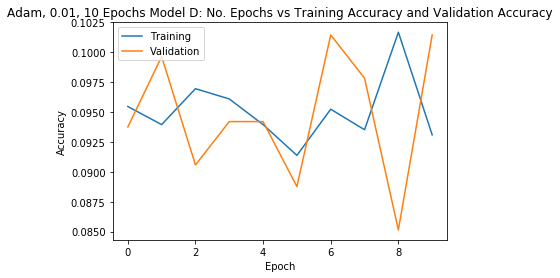

In [ ]:

plt.plot(model_D_10_001_adam_fit.history['acc'])
plt.plot(model_D_10_001_adam_fit.history['val_acc'])
plt.title('Adam, 0.01, 10 Epochs Model D: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

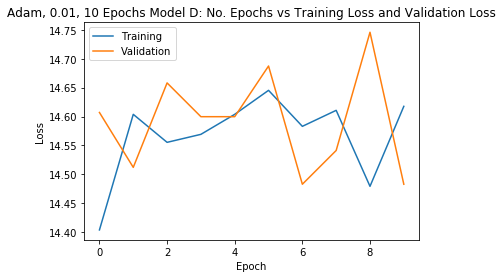

In [ ]:
plt.plot(model_D_10_001_adam_fit.history['loss'])
plt.plot(model_D_10_001_adam_fit.history['val_loss'])
plt.title('Adam, 0.01, 10 Epochs Model D: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D_10_001_adam_eval = model_D_10_001_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D_10_001_adam_eval[1]

0.08152173913043478

#### Conclusions

Here, we see that the model, though it performed extremely poorly on the dataset in terms of accuracy, achieved relatively stable accuracies during training. The validation accuracy, however, was relatively more unstable than the training accuracy. The training accuracy seemed to hover around 0.09, whereas the validation accuracy jumped around those values.

Looking at the loss, we see, again, abyssmal values. The training loss seems to be jumping around 14, whereas the validation loss seems to be more unstable but still jump around 14 as well.

When evaluated on the validation set, we see that the accuracy was around 8%, which is terrible.

These unimpressive accuracy scores and loss scores may be due to our small data set and its high variability. However, we will continue to tune the hyper-parameters in hopes of figuring out what is wrong with the data set. 

### Evaluating Configuration D1



In [ ]:
model_D1_10_001_adam = init_config_D1((224, 224, 3), n_classes)
model_D1_10_001_adam.compile(optimizer = init_adam(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D1_10_001_adam_fit = fit_gen(model_D1_10_001_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

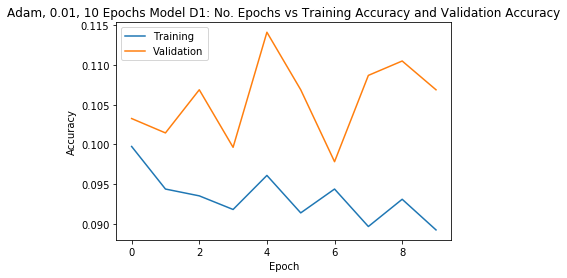

In [ ]:
plt.plot(model_D1_10_001_adam_fit.history['acc'])
plt.plot(model_D1_10_001_adam_fit.history['val_acc'])
plt.title('Adam, 0.01, 10 Epochs Model D1: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

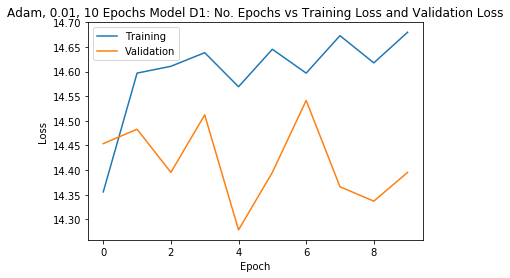

In [ ]:
plt.plot(model_D1_10_001_adam_fit.history['loss'])
plt.plot(model_D1_10_001_adam_fit.history['val_loss'])
plt.title('Adam, 0.01, 10 Epochs Model D1: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D1_10_001_adam_eval = model_D1_10_001_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D1_10_001_adam_eval[1]

0.11231884057971014

#### Conclusions

Here, we see that the model again performed extremely poorly on the dataset in terms of accuracy, but achieved relatively stable accuracies during training. The validation accuracy, however, was again relatively more unstable than the training accuracy. The training accuracy seemed to decrease from 10% to 9%, whereas the validation accuracy jumped around 10%.

Looking at the loss, we see, again, abyssmal values. The training loss seems to increase from 14 to almost 15, while the validation loss seems to be more unstable and jump around 14 as well.

When evaluated on the validation set, we see that the accuracy was around 11%, which is slightly better than configuration D.


### Evaluating Configuration D2



In [ ]:
model_D2_10_001_adam = init_config_D2((224, 224, 3), n_classes)
model_D2_10_001_adam.compile(optimizer = init_adam(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D2_10_001_adam_fit = fit_gen(model_D2_10_001_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

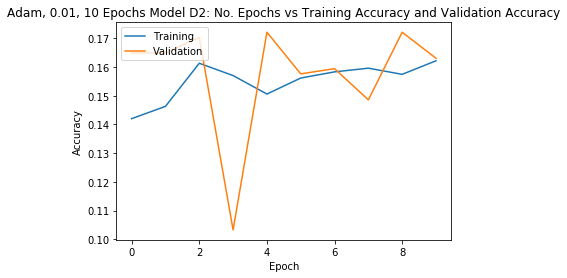

In [ ]:
plt.plot(model_D2_10_001_adam_fit.history['acc'])
plt.plot(model_D2_10_001_adam_fit.history['val_acc'])
plt.title('Adam, 0.01, 10 Epochs Model D2: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

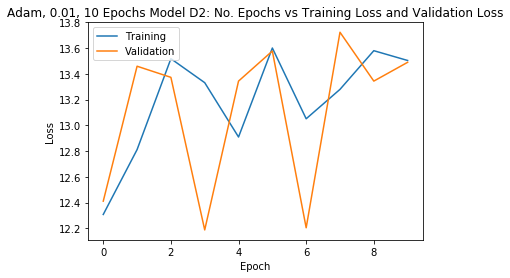

In [ ]:
plt.plot(model_D2_10_001_adam_fit.history['loss'])
plt.plot(model_D2_10_001_adam_fit.history['val_loss'])
plt.title('Adam, 0.01, 10 Epochs Model D2: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D2_10_001_adam_eval = model_D2_10_001_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D2_10_001_adam_eval[1]

0.17391304347826086

#### Conclusions

During training, we see that the model stabilized with an accuracy of around 15%, which is bad. The validation accuracy was more unstable, and we see a major dip in it. However, the validation accuracy also seemed to stabilize with the training accuracy, which means that there is no overfitting going on.

The loss graph shows that the validation and training accuracies were relatively similar, jumping around 12 and 13, slightly better than the last two models.

When evaluated on the validation set, we see that the accuracy was around 17%, which is the best result so far.

### Evaluating Configuration D3



In [ ]:
model_D3_10_001_adam = init_config_D3((224, 224, 3), n_classes)
model_D3_10_001_adam.compile(optimizer = init_adam(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D3_10_001_adam_fit = fit_gen(model_D3_10_001_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

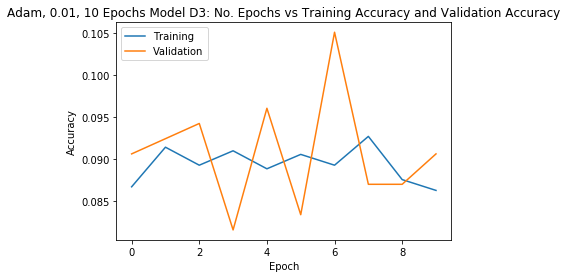

In [ ]:
plt.plot(model_D3_10_001_adam_fit.history['acc'])
plt.plot(model_D3_10_001_adam_fit.history['val_acc'])
plt.title('Adam, 0.01, 10 Epochs Model D3: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

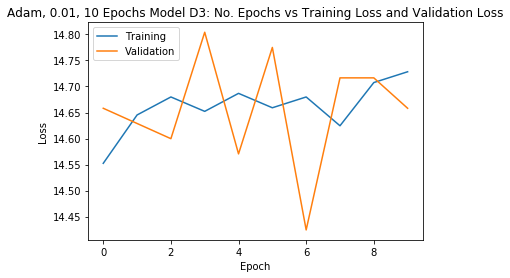

In [ ]:
plt.plot(model_D3_10_001_adam_fit.history['loss'])
plt.plot(model_D3_10_001_adam_fit.history['val_loss'])
plt.title('Adam, 0.01, 10 Epochs Model D3: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D3_10_001_adam_eval = model_D3_10_001_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D3_10_001_adam_eval[1]

0.09057971014492754

#### Conclusions

The training accuracy seems to stabilize around 9%, which seems similar to Configuration D. Again, the validation accuracy is more wild and jumps around 9% and 10% accuracy.

The loss, again, seems to stay around 14 for both the training and validation accuracy, where the validation accuracy is much more unstable.

Evaluating this model gives us an accuracy of 9%, which, typically, is an abysmmal score, but is similar to configurations D and D1. Again, these terrible scores may be explained by the variability in our dataset. This will be explored more in the paper.


## Hyper-parameters used:
- Adam Optimizer
- 0.1 learning rate
- 10 epochs

### Evaluating Configuration D



In [ ]:
model_D_10_01_adam = init_config_D((224, 224, 3), n_classes)
model_D_10_01_adam.compile(optimizer = init_adam(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D_10_01_adam_fit = fit_gen(model_D_10_01_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

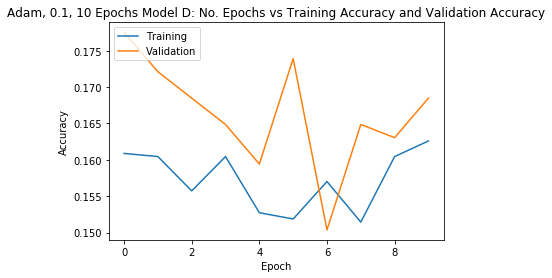

In [ ]:
plt.plot(model_D_10_01_adam_fit.history['acc'])
plt.plot(model_D_10_01_adam_fit.history['val_acc'])
plt.title('Adam, 0.1, 10 Epochs Model D: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

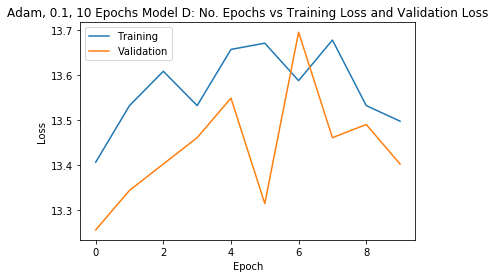

In [ ]:
plt.plot(model_D_10_01_adam_fit.history['loss'])
plt.plot(model_D_10_01_adam_fit.history['val_loss'])
plt.title('Adam, 0.1, 10 Epochs Model D: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D_10_01_adam_eval = model_D_10_01_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D_10_01_adam_eval[1]

0.16485507246376813

#### Conclusions

The training accuracy seems to perform the best here, where we see stable values around 16%. Though this is typically bad, in regards to our model this has been a top performer. The validation accuracy seems to be slightly more accurate, but this can be due to the small amount of epochs we trained on.

As for the loss, we see that the training loss is slightly higher than the validation loss, but both seem to show similar patterns. The validation loss seems to be slightly lower.

Evaluating this model shows us an accuracy of 16%, which, at least in this experiment, is a top contender. 

### Evaluating Configuration D1

In [ ]:
model_D1_10_01_adam = init_config_D1((224, 224, 3), n_classes)
model_D1_10_01_adam.compile(optimizer = init_adam(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D1_10_01_adam_fit = fit_gen(model_D1_10_01_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 50s 689ms/step - loss: 14.4566 - acc: 0.0922 - val_loss: 14.6873 - val_acc: 0.0888
Epoch 2/10
73/73 [==============================] - 45s 610ms/step - loss: 14.6239 - acc: 0.0927 - val_loss: 14.6630 - val_acc: 0.0903
Epoch 3/10
73/73 [==============================] - 45s 615ms/step - loss: 14.6459 - acc: 0.0913 - val_loss: 14.6873 - val_acc: 0.0888
Epoch 4/10
73/73 [==============================] - 44s 600ms/step - loss: 14.6333 - acc: 0.0921 - val_loss: 14.5705 - val_acc: 0.0960
Epoch 5/10
73/73 [==============================] - 45s 615ms/step - loss: 14.5963 - acc: 0.0944 - val_loss: 14.8041 - val_acc: 0.0815
Epoch 6/10
73/73 [==============================] - 44s 597ms/step - loss: 14.6189 - acc: 0.0930 - val_loss: 14.4245 - val_acc: 0.1051
Epoch 7/10
73/73 [==============================] - 44s 603ms/step - loss: 14.5988 - acc: 0.0943 - val_loss: 14.8333 - val_acc: 0.0797
Epoch 8/10
73/73 [==============================] - 45s

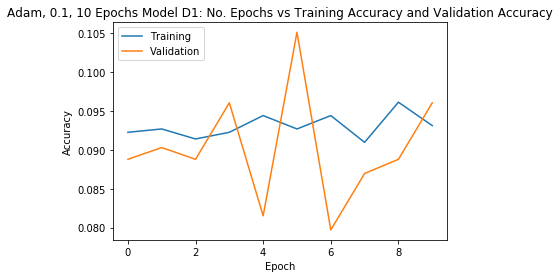

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_D1_10_01_adam_fit.history['acc'])
plt.plot(model_D1_10_01_adam_fit.history['val_acc'])
plt.title('Adam, 0.1, 10 Epochs Model D1: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

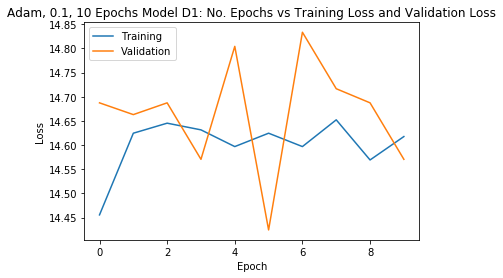

In [ ]:
plt.plot(model_D1_10_01_adam_fit.history['loss'])
plt.plot(model_D1_10_01_adam_fit.history['val_loss'])
plt.title('Adam, 0.1, 10 Epochs Model D1: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D1_10_01_adam_eval = model_D1_10_01_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D1_10_01_adam_eval[1]

0.08514492753623189

#### Conclusions

The training accuracy stabilizes around 9%, which is relatively poor in this experiment. The validation accuracy is, again, much more unstable but seems to jump around 9%.

We see that the training loss has increased in the beginning but stabilizes around 14. The validation loss is much more unstable but also sticks around 14.

Evaluating this model shows us an accuracy of 8%. 

### Evaluating Configuration D2


In [ ]:
model_D2_10_01_adam = init_config_D2((224, 224, 3), n_classes)
model_D2_10_01_adam.compile(optimizer = init_adam(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D2_10_01_adam_fit = fit_gen(model_D2_10_01_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 49s 676ms/step - loss: 14.1638 - acc: 0.1078 - val_loss: 14.4537 - val_acc: 0.1033
Epoch 2/10
73/73 [==============================] - 45s 611ms/step - loss: 14.5424 - acc: 0.0978 - val_loss: 14.2493 - val_acc: 0.1159
Epoch 3/10
73/73 [==============================] - 45s 610ms/step - loss: 14.4928 - acc: 0.1008 - val_loss: 14.5121 - val_acc: 0.0996
Epoch 4/10
73/73 [==============================] - 45s 611ms/step - loss: 14.3755 - acc: 0.1081 - val_loss: 14.4245 - val_acc: 0.1051
Epoch 5/10
73/73 [==============================] - 43s 589ms/step - loss: 14.3724 - acc: 0.1083 - val_loss: 14.3953 - val_acc: 0.1069
Epoch 6/10
73/73 [==============================] - 44s 604ms/step - loss: 14.4928 - acc: 0.1008 - val_loss: 14.4829 - val_acc: 0.1014
Epoch 7/10
73/73 [==============================] - 45s 615ms/step - loss: 14.4363 - acc: 0.1043 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 8/10
73/73 [==============================] - 44s

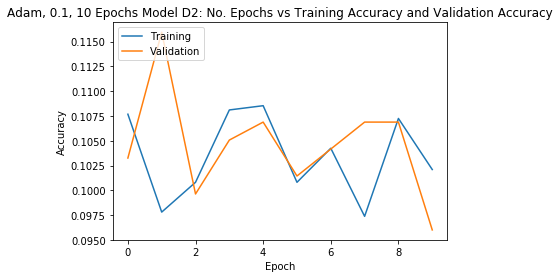

In [ ]:
plt.plot(model_D2_10_01_adam_fit.history['acc'])
plt.plot(model_D2_10_01_adam_fit.history['val_acc'])
plt.title('Adam, 0.1, 10 Epochs Model D2: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

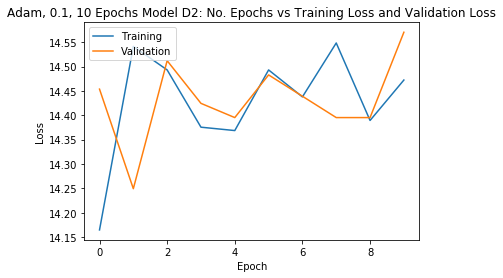

In [ ]:
plt.plot(model_D2_10_01_adam_fit.history['loss'])
plt.plot(model_D2_10_01_adam_fit.history['val_loss'])
plt.title('Adam, 0.1, 10 Epochs Model D2: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D2_10_01_adam_eval = model_D2_10_01_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D2_10_01_adam_eval[1]

0.10869565217391304

#### Conclusions

Here, we see that the training and validation accuracies are quite similar. Both accuracies hover around the 10% mark, and show similar patterns of jumping around. This shows that the model was able to learn, but was not able to learn quite well.

As for the training and validation losses, we see similar patterns. The losses seem to increase but stay around 14.


Evaluating this model shows us an accuracy of 10%. 

### Evaluating Configuration D3



In [ ]:
model_D3_10_01_adam = init_config_D3((224, 224, 3), n_classes)
model_D3_10_01_adam.compile(optimizer = init_adam(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D3_10_01_adam_fit = fit_gen(model_D3_10_01_adam, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 49s 675ms/step - loss: 1.4224 - acc: 0.0734 - val_loss: 1.1921e-07 - val_acc: 0.0670
Epoch 2/10
73/73 [==============================] - 45s 614ms/step - loss: 1.1921e-07 - acc: 0.0711 - val_loss: 1.1921e-07 - val_acc: 0.0707
Epoch 3/10
73/73 [==============================] - 44s 606ms/step - loss: 1.1921e-07 - acc: 0.0674 - val_loss: 1.1921e-07 - val_acc: 0.0712
Epoch 4/10
73/73 [==============================] - 44s 603ms/step - loss: 1.1921e-07 - acc: 0.0718 - val_loss: 1.1921e-07 - val_acc: 0.0670
Epoch 5/10
73/73 [==============================] - 45s 613ms/step - loss: 1.1921e-07 - acc: 0.0657 - val_loss: 1.1921e-07 - val_acc: 0.0688
Epoch 6/10
73/73 [==============================] - 43s 592ms/step - loss: 1.1921e-07 - acc: 0.0738 - val_loss: 1.1921e-07 - val_acc: 0.0779
Epoch 7/10
73/73 [==============================] - 44s 604ms/step - loss: 1.1921e-07 - acc: 0.0677 - val_loss: 1.1921e-07 - val_acc: 0.0616
Epoch 8/10
73/73 

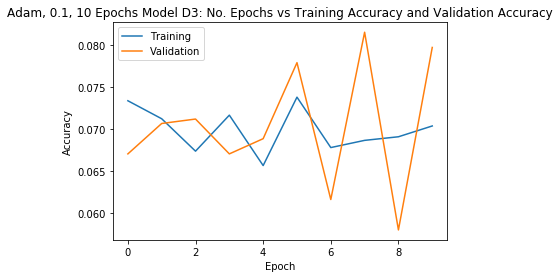

In [ ]:
plt.plot(model_D3_10_01_adam_fit.history['acc'])
plt.plot(model_D3_10_01_adam_fit.history['val_acc'])
plt.title('Adam, 0.1, 10 Epochs Model D3: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

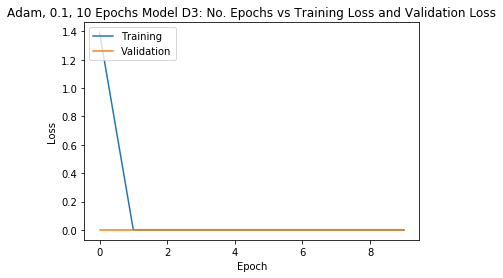

In [ ]:
plt.plot(model_D3_10_01_adam_fit.history['loss'])
plt.plot(model_D3_10_01_adam_fit.history['val_loss'])
plt.title('Adam, 0.1, 10 Epochs Model D3: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D3_10_01_adam_eval = model_D3_10_01_adam.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D3_10_01_adam_eval[1]

0.07608695652173914

#### Conclusions

Here, we see that the training and validation accuracies are again quite similar. Both accuracies hover around the 7% mark, and show similar patterns of jumping around. The training accuracy was slightly more accurate, however.

As for the training and validation losses, we see something unique: the training accuracy and validation accuray are almost 0, showing that the model was able to learn and thus have extremely low error. 

Evaluating this model shows us an accuracy of 7%. 

## Hyper-parameters used:
- SGD Optimizer
- 0.01 learning rate
- 10 epochs


### Evaluating Configuration D



In [ ]:
model_D_10_001_sgd = init_config_D((224, 224, 3), n_classes)
model_D_10_001_sgd.compile(optimizer = init_sgd(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D_10_001_sgd_fit = fit_gen(model_D_10_001_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 62s 843ms/step - loss: 14.3449 - acc: 0.1004 - val_loss: 14.3953 - val_acc: 0.1069
Epoch 2/10
73/73 [==============================] - 42s 569ms/step - loss: 14.4376 - acc: 0.1043 - val_loss: 14.4537 - val_acc: 0.1033
Epoch 3/10
73/73 [==============================] - 44s 607ms/step - loss: 14.4458 - acc: 0.1038 - val_loss: 14.5413 - val_acc: 0.0978
Epoch 4/10
73/73 [==============================] - 44s 602ms/step - loss: 14.4363 - acc: 0.1043 - val_loss: 14.2201 - val_acc: 0.1178
Epoch 5/10
73/73 [==============================] - 43s 586ms/step - loss: 14.4746 - acc: 0.1020 - val_loss: 14.8333 - val_acc: 0.0797
Epoch 6/10
73/73 [==============================] - 44s 603ms/step - loss: 14.4790 - acc: 0.1017 - val_loss: 14.2785 - val_acc: 0.1141
Epoch 7/10
73/73 [==============================] - 44s 606ms/step - loss: 14.4514 - acc: 0.1034 - val_loss: 14.4829 - val_acc: 0.1014
Epoch 8/10
73/73 [==============================] - 44s

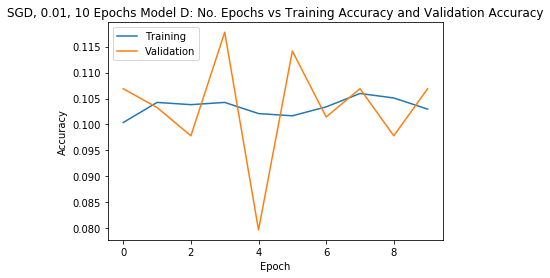

In [ ]:
plt.plot(model_D_10_001_sgd_fit.history['acc'])
plt.plot(model_D_10_001_sgd_fit.history['val_acc'])
plt.title('SGD, 0.01, 10 Epochs Model D: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

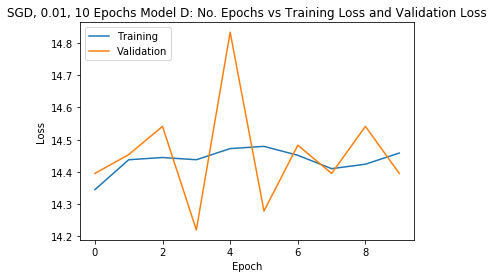

In [ ]:
plt.plot(model_D_10_001_sgd_fit.history['loss'])
plt.plot(model_D_10_001_sgd_fit.history['val_loss'])
plt.title('SGD, 0.01, 10 Epochs Model D: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D_10_001_sgd_eval = model_D_10_001_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D_10_001_sgd_eval[1]

0.10326086956521739

#### Conclusions

Using an SGD optimizer for model D shows us that the training accuracy was relatively stable, around 10%, throughout the 10 epochs. The validation accuracy was more unstable, and jumped around 8% and 11% accuracy.

The training and validation losses showed a similar pattern, but was around 14 instead.

The evaluation accuracy was around 10%. 

Again, the terrible scores can be due to the dataset that we have opted to use.

### Evaluating Configuration D1

In [ ]:
model_D1_10_001_sgd = init_config_D1((224, 224, 3), n_classes)
model_D1_10_001_sgd.compile(optimizer = init_sgd(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D1_10_001_sgd_fit = fit_gen(model_D1_10_001_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 48s 664ms/step - loss: 14.4208 - acc: 0.0944 - val_loss: 14.5705 - val_acc: 0.0960
Epoch 2/10
73/73 [==============================] - 44s 602ms/step - loss: 14.5863 - acc: 0.0950 - val_loss: 14.5705 - val_acc: 0.0960
Epoch 3/10
73/73 [==============================] - 44s 607ms/step - loss: 14.5348 - acc: 0.0982 - val_loss: 14.6070 - val_acc: 0.0938
Epoch 4/10
73/73 [==============================] - 43s 596ms/step - loss: 14.6195 - acc: 0.0930 - val_loss: 14.5997 - val_acc: 0.0942
Epoch 5/10
73/73 [==============================] - 44s 600ms/step - loss: 14.5838 - acc: 0.0952 - val_loss: 14.5121 - val_acc: 0.0996
Epoch 6/10
73/73 [==============================] - 44s 602ms/step - loss: 14.6132 - acc: 0.0934 - val_loss: 14.6581 - val_acc: 0.0906
Epoch 7/10
73/73 [==============================] - 44s 605ms/step - loss: 14.5700 - acc: 0.0960 - val_loss: 14.4537 - val_acc: 0.1033
Epoch 8/10
73/73 [==============================] - 44s

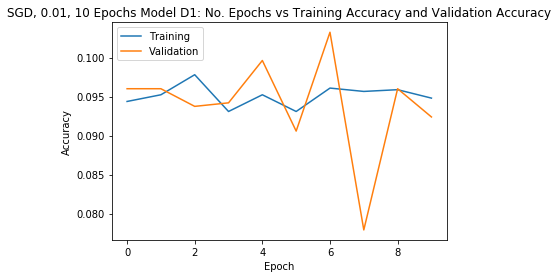

In [ ]:
plt.plot(model_D1_10_001_sgd_fit.history['acc'])
plt.plot(model_D1_10_001_sgd_fit.history['val_acc'])
plt.title('SGD, 0.01, 10 Epochs Model D1: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

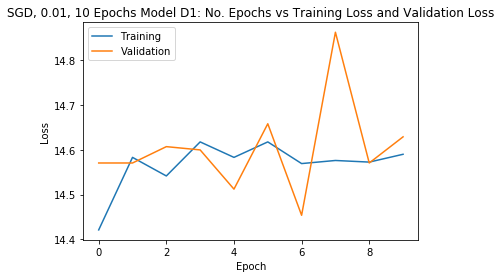

In [ ]:
plt.plot(model_D1_10_001_sgd_fit.history['loss'])
plt.plot(model_D1_10_001_sgd_fit.history['val_loss'])
plt.title('SGD, 0.01, 10 Epochs Model D1: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D1_10_001_sgd_eval = model_D1_10_001_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D1_10_001_sgd_eval[1]

0.09420289855072464

#### Conclusions

For Model D1, we see that the training accuracy was relatively stable, at around 9%, whereas the validation accuracy was unstsable and jumped around 8% and 10%. This shows that our model was not learning, which can be due to the optimizer used.

As for the losses, we see a similar pattern as Model D, where the training loss hovered around 14 and the validation loss was more unstable.

The overall evaluation accuracy was 9%.

### Evaluating Configuration D2


In [ ]:
model_D2_10_001_sgd = init_config_D2((224, 224, 3), n_classes)
model_D2_10_001_sgd.compile(optimizer = init_sgd(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D2_10_001_sgd_fit = fit_gen(model_D2_10_001_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 52s 706ms/step - loss: 13.2162 - acc: 0.1029 - val_loss: 13.9300 - val_acc: 0.0924
Epoch 2/10
73/73 [==============================] - 43s 594ms/step - loss: 14.1439 - acc: 0.0879 - val_loss: 14.6873 - val_acc: 0.0888
Epoch 3/10
73/73 [==============================] - 43s 583ms/step - loss: 14.6377 - acc: 0.0918 - val_loss: 14.8917 - val_acc: 0.0761
Epoch 4/10
73/73 [==============================] - 44s 609ms/step - loss: 14.6226 - acc: 0.0928 - val_loss: 14.3077 - val_acc: 0.1123
Epoch 5/10
73/73 [==============================] - 44s 596ms/step - loss: 14.5994 - acc: 0.0942 - val_loss: 14.5997 - val_acc: 0.0942
Epoch 6/10
73/73 [==============================] - 43s 589ms/step - loss: 14.6001 - acc: 0.0942 - val_loss: 14.4829 - val_acc: 0.1014
Epoch 7/10
73/73 [==============================] - 44s 601ms/step - loss: 14.6277 - acc: 0.0925 - val_loss: 14.6873 - val_acc: 0.0888
Epoch 8/10
73/73 [==============================] - 44s

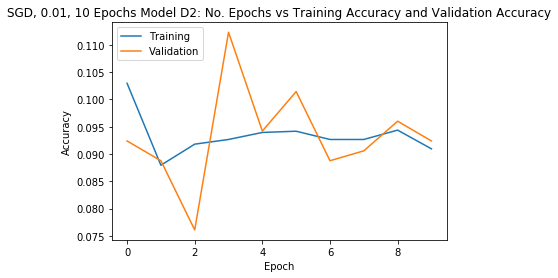

In [ ]:
plt.plot(model_D2_10_001_sgd_fit.history['acc'])
plt.plot(model_D2_10_001_sgd_fit.history['val_acc'])
plt.title('SGD, 0.01, 10 Epochs Model D2: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

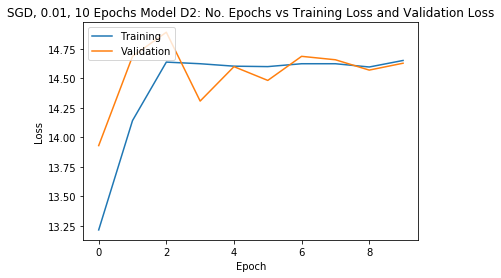

In [ ]:
plt.plot(model_D2_10_001_sgd_fit.history['loss'])
plt.plot(model_D2_10_001_sgd_fit.history['val_loss'])
plt.title('SGD, 0.01, 10 Epochs Model D2: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D2_10_001_sgd_eval = model_D2_10_001_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D2_10_001_sgd_eval[1]

0.08876811594202899

#### Conclusions

For Model D2, we see that the training accuracy and validation accuracies showed similar results found in the last two models. However, the training accuracy seems to hover around 10%.

As for the losses, we see that the training and validation losses are relatively similar, where both increase from 13 to about 14.

The overal evaluation accuracy was about 8%.

### Evaluating Configuration D3



In [ ]:
model_D3_10_001_sgd = init_config_D3((224, 224, 3), n_classes)
model_D3_10_001_sgd.compile(optimizer = init_sgd(0.01), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D3_10_001_sgd_fit = fit_gen(model_D3_10_001_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 49s 670ms/step - loss: 14.2509 - acc: 0.1050 - val_loss: 14.5705 - val_acc: 0.0960
Epoch 2/10
73/73 [==============================] - 42s 569ms/step - loss: 14.3949 - acc: 0.1069 - val_loss: 14.3077 - val_acc: 0.1123
Epoch 3/10
73/73 [==============================] - 44s 605ms/step - loss: 14.3862 - acc: 0.1074 - val_loss: 14.4537 - val_acc: 0.1033
Epoch 4/10
73/73 [==============================] - 43s 587ms/step - loss: 14.4113 - acc: 0.1059 - val_loss: 14.3832 - val_acc: 0.1076
Epoch 5/10
73/73 [==============================] - 43s 589ms/step - loss: 14.3604 - acc: 0.1090 - val_loss: 14.3369 - val_acc: 0.1105
Epoch 6/10
73/73 [==============================] - 44s 596ms/step - loss: 14.4169 - acc: 0.1055 - val_loss: 14.4829 - val_acc: 0.1014
Epoch 7/10
73/73 [==============================] - 43s 590ms/step - loss: 14.3949 - acc: 0.1069 - val_loss: 14.4537 - val_acc: 0.1033
Epoch 8/10
73/73 [==============================] - 43s

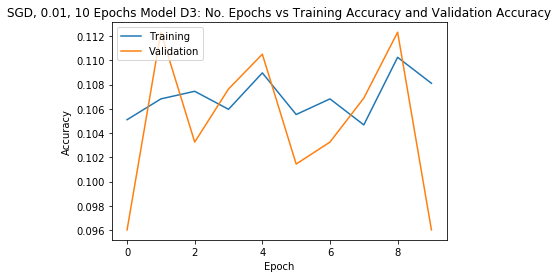

In [ ]:
plt.plot(model_D3_10_001_sgd_fit.history['acc'])
plt.plot(model_D3_10_001_sgd_fit.history['val_acc'])
plt.title('SGD, 0.01, 10 Epochs Model D3: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

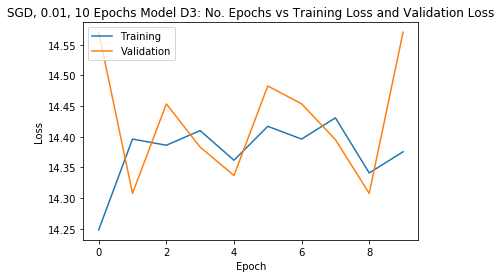

In [ ]:
plt.plot(model_D3_10_001_sgd_fit.history['loss'])
plt.plot(model_D3_10_001_sgd_fit.history['val_loss'])
plt.title('SGD, 0.01, 10 Epochs Model D3: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D3_10_001_sgd_eval = model_D3_10_001_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D3_10_001_sgd_eval[1]

0.12318840579710146

#### Conclusions

We see that the training accuracy stabilized around 10%, whereas the validation accuracy jumped more around 9% and 10%.

The losses show a similar pattern.

The overall evaluation accuracy, however, was the highest of the models for these particular hyper-parameters, reaching around 12%.
It should be noted that this is not a big jump from the other models, however, and that this increase may be due to chance.

## Hyper-parameters used:
- SGD Optimizer
- 0.1 learning rate
- 10 epochs

### Evaluating Configuration D



In [ ]:
model_D_10_01_sgd = init_config_D((224, 224, 3), n_classes)
model_D_10_01_sgd.compile(optimizer = init_sgd(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D_10_01_sgd_fit = fit_gen(model_D_10_01_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

W0614 06:35:07.888045 140589714945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 06:35:07.908703 140589714945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 06:35:07.911958 140589714945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 06:35:07.947132 140589714945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 06:35:08.093425 140589714945920 deprecation_wrapp

Epoch 1/10
73/73 [==============================] - 58s 794ms/step - loss: 13.3552 - acc: 0.1605 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 2/10
73/73 [==============================] - 47s 641ms/step - loss: 13.5186 - acc: 0.1613 - val_loss: 13.6653 - val_acc: 0.1522
Epoch 3/10
73/73 [==============================] - 44s 599ms/step - loss: 13.4609 - acc: 0.1649 - val_loss: 13.2273 - val_acc: 0.1793
Epoch 4/10
73/73 [==============================] - 44s 605ms/step - loss: 13.5092 - acc: 0.1619 - val_loss: 13.5777 - val_acc: 0.1576
Epoch 5/10
73/73 [==============================] - 43s 592ms/step - loss: 13.5349 - acc: 0.1603 - val_loss: 13.3733 - val_acc: 0.1703
Epoch 6/10
73/73 [==============================] - 44s 606ms/step - loss: 13.4314 - acc: 0.1667 - val_loss: 13.6945 - val_acc: 0.1504
Epoch 7/10
73/73 [==============================] - 44s 605ms/step - loss: 13.5807 - acc: 0.1574 - val_loss: 13.1982 - val_acc: 0.1812
Epoch 8/10
73/73 [==============================] - 43s

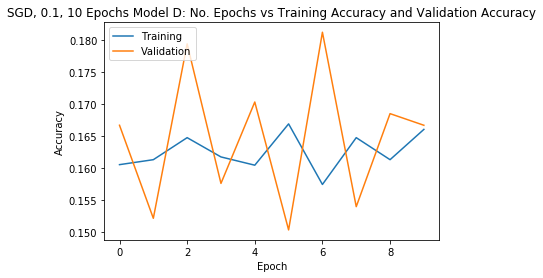

In [ ]:
plt.plot(model_D_10_01_sgd_fit.history['acc'])
plt.plot(model_D_10_01_sgd_fit.history['val_acc'])
plt.title('SGD, 0.1, 10 Epochs Model D: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

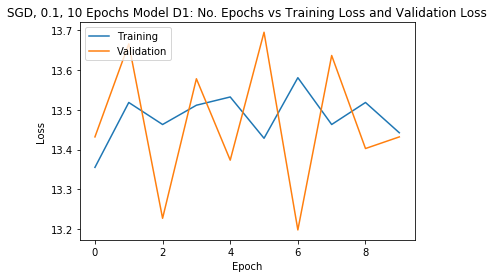

In [ ]:
plt.plot(model_D_10_01_sgd_fit.history['loss'])
plt.plot(model_D_10_01_sgd_fit.history['val_loss'])
plt.title('SGD, 0.1, 10 Epochs Model D1: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D_10_01_sgd_eval = model_D_10_01_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D_10_01_sgd_eval[1]

0.1539855072463768

#### Conclusions

Here, we see that the training accuracy reached and stayed around 16%, which is relatively high compared to the rest of the models and hyper-parameters we have seen. The validation accuracy showed much more unstable readings, however.

The losses are quite similar in that they both exhibit unstable behavior around 13, but the training loss is slightly more stable.

As for the evaluation accuracy, we see that this model achieved 15%.

### Evaluating Configuration D1

In [ ]:
model_D1_10_01_sgd = init_config_D1((224, 224, 3), n_classes)
model_D1_10_01_sgd.compile(optimizer = init_sgd(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D1_10_01_sgd_fit = fit_gen(model_D1_10_01_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

W0614 06:42:53.824409 140589714945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



Epoch 1/10
73/73 [==============================] - 49s 675ms/step - loss: 14.2594 - acc: 0.1041 - val_loss: 14.5121 - val_acc: 0.0996
Epoch 2/10
73/73 [==============================] - 44s 599ms/step - loss: 14.4125 - acc: 0.1058 - val_loss: 14.3369 - val_acc: 0.1105
Epoch 3/10
73/73 [==============================] - 43s 596ms/step - loss: 14.4846 - acc: 0.1013 - val_loss: 14.5121 - val_acc: 0.0996
Epoch 4/10
73/73 [==============================] - 44s 596ms/step - loss: 14.2488 - acc: 0.1160 - val_loss: 14.3661 - val_acc: 0.1087
Epoch 5/10
73/73 [==============================] - 44s 597ms/step - loss: 14.4432 - acc: 0.1039 - val_loss: 14.3661 - val_acc: 0.1087
Epoch 6/10
73/73 [==============================] - 43s 594ms/step - loss: 14.4790 - acc: 0.1017 - val_loss: 14.1617 - val_acc: 0.1214
Epoch 7/10
73/73 [==============================] - 44s 609ms/step - loss: 14.4138 - acc: 0.1057 - val_loss: 14.6581 - val_acc: 0.0906
Epoch 8/10
73/73 [==============================] - 43s

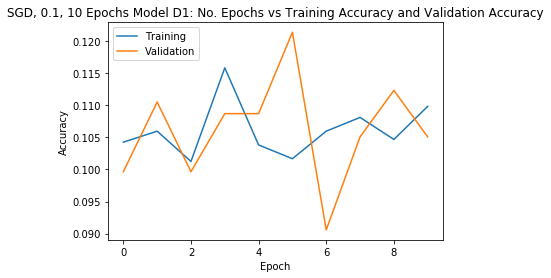

In [ ]:
plt.plot(model_D1_10_01_sgd_fit.history['acc'])
plt.plot(model_D1_10_01_sgd_fit.history['val_acc'])
plt.title('SGD, 0.1, 10 Epochs Model D1: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

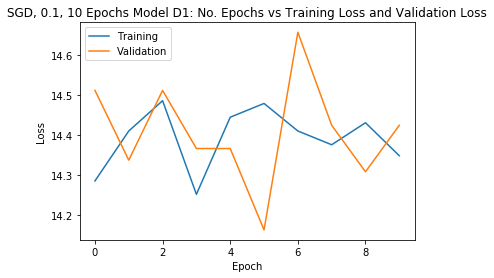

In [ ]:
plt.plot(model_D1_10_01_sgd_fit.history['loss'])
plt.plot(model_D1_10_01_sgd_fit.history['val_loss'])
plt.title('SGD, 0.1, 10 Epochs Model D1: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D1_10_01_sgd_eval = model_D1_10_01_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D1_10_01_sgd_eval[1]

0.1068840579710145

#### Conclusions

The training accuracy seems to be around 10%, with a big spike at the third epoch. The validation accuracy is much more unstable, showing a dip at the 6th epoch.

The losses show a similar pattern, where the validation loss is much more unstable, and both losses hover around 14.

As for the evaluation accuracy, we see that this model achieved 10%.

### Evaluating Configuration D2


In [ ]:
model_D2_10_01_sgd = init_config_D2((224, 224, 3), n_classes)
model_D2_10_01_sgd.compile(optimizer = init_sgd(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D2_10_01_sgd_fit = fit_gen(model_D2_10_01_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 50s 683ms/step - loss: 14.3677 - acc: 0.0974 - val_loss: 14.5413 - val_acc: 0.0978
Epoch 2/10
73/73 [==============================] - 44s 600ms/step - loss: 14.6252 - acc: 0.0926 - val_loss: 14.5790 - val_acc: 0.0955
Epoch 3/10
73/73 [==============================] - 43s 596ms/step - loss: 14.5881 - acc: 0.0949 - val_loss: 14.5705 - val_acc: 0.0960
Epoch 4/10
73/73 [==============================] - 44s 597ms/step - loss: 14.5424 - acc: 0.0978 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 5/10
73/73 [==============================] - 44s 598ms/step - loss: 14.5838 - acc: 0.0952 - val_loss: 14.5997 - val_acc: 0.0942
Epoch 6/10
73/73 [==============================] - 44s 598ms/step - loss: 14.6446 - acc: 0.0914 - val_loss: 14.5121 - val_acc: 0.0996
Epoch 7/10
73/73 [==============================] - 45s 617ms/step - loss: 14.5781 - acc: 0.0955 - val_loss: 14.5413 - val_acc: 0.0978
Epoch 8/10
73/73 [==============================] - 44s

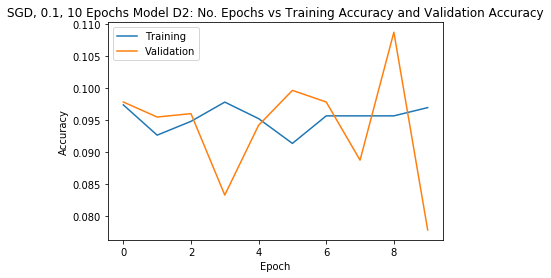

In [ ]:
plt.plot(model_D2_10_01_sgd_fit.history['acc'])
plt.plot(model_D2_10_01_sgd_fit.history['val_acc'])
plt.title('SGD, 0.1, 10 Epochs Model D2: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

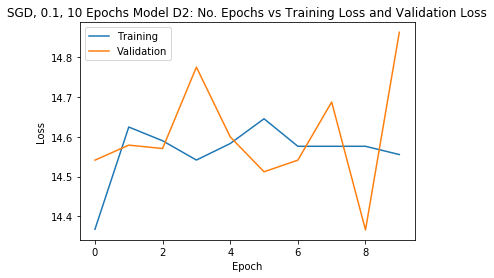

In [ ]:
plt.plot(model_D2_10_01_sgd_fit.history['loss'])
plt.plot(model_D2_10_01_sgd_fit.history['val_loss'])
plt.title('SGD, 0.1, 10 Epochs Model D2: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D2_10_01_sgd_eval = model_D2_10_01_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D2_10_01_sgd_eval[1]

0.09782608695652174

#### Conclusions

The training accuracy is markedly different from the validation accuracy, where we see that it is much more stable than the validation accuracy. However, both values still hover around 10%.

As for the losses, we see that they both stick around 14, with the validation loss much more unstable.

The evaluation accuracy was about 9%.

### Evaluating Configuration D3



In [ ]:
model_D3_10_01_sgd = init_config_D3((224, 224, 3), n_classes)
model_D3_10_01_sgd.compile(optimizer = init_sgd(0.1), 
                             loss = 'categorical_crossentropy',
                             metrics = ['accuracy'])
model_D3_10_01_sgd_fit = fit_gen(model_D3_10_01_sgd, training_set, 
                                  num_training // batch_size, 
                                  10, 
                                  testing_set, num_testing // batch_size)

Epoch 1/10
73/73 [==============================] - 48s 662ms/step - loss: 1.1614 - acc: 0.0703 - val_loss: 1.1921e-07 - val_acc: 0.0725
Epoch 2/10
73/73 [==============================] - 42s 580ms/step - loss: 1.1921e-07 - acc: 0.0733 - val_loss: 1.1921e-07 - val_acc: 0.0580
Epoch 3/10
73/73 [==============================] - 43s 589ms/step - loss: 1.1921e-07 - acc: 0.0679 - val_loss: 1.1921e-07 - val_acc: 0.0725
Epoch 4/10
73/73 [==============================] - 42s 581ms/step - loss: 1.1921e-07 - acc: 0.0681 - val_loss: 1.1921e-07 - val_acc: 0.0652
Epoch 5/10
73/73 [==============================] - 42s 582ms/step - loss: 1.1921e-07 - acc: 0.0699 - val_loss: 1.1921e-07 - val_acc: 0.0743
Epoch 6/10
73/73 [==============================] - 43s 587ms/step - loss: 1.1921e-07 - acc: 0.0687 - val_loss: 1.1921e-07 - val_acc: 0.0670
Epoch 7/10
73/73 [==============================] - 43s 586ms/step - loss: 1.1921e-07 - acc: 0.0699 - val_loss: 1.1921e-07 - val_acc: 0.0725
Epoch 8/10
73/73 

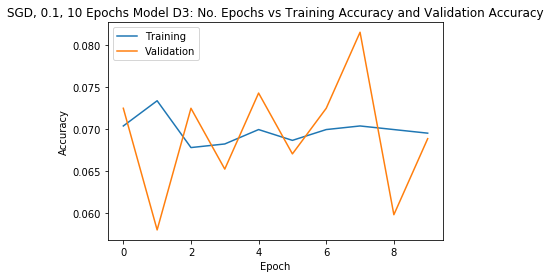

In [ ]:
plt.plot(model_D3_10_01_sgd_fit.history['acc'])
plt.plot(model_D3_10_01_sgd_fit.history['val_acc'])
plt.title('SGD, 0.1, 10 Epochs Model D3: No. Epochs vs Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

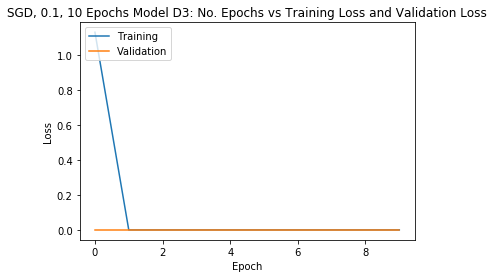

In [ ]:
plt.plot(model_D3_10_01_sgd_fit.history['loss'])
plt.plot(model_D3_10_01_sgd_fit.history['val_loss'])
plt.title('SGD, 0.1, 10 Epochs Model D3: No. Epochs vs Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model_D3_10_01_sgd_eval = model_D3_10_01_sgd.evaluate_generator(testing_set, 
                                                                  num_testing // batch_size)
model_D3_10_01_sgd_eval[1]

0.07065217391304347

#### Conclusions

Here, we see the training accuracy stayed around 7%, which is relatively bad compared to the other configurations using these hyper-parameters. The validation accuracy again showed an unstable behavior.

The losses both show extremely low values, showing that the model was able to minimize its cross-entropy loss. 

As for the model's evaluation accuracy, we see 7%.